Accuracy: 76.92%

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.80      0.57      0.67         7
           2       0.80      1.00      0.89         4
           3       1.00      0.67      0.80         3
           4       1.00      0.67      0.80         3

    accuracy                           0.77        26
   macro avg       0.85      0.76      0.78        26
weighted avg       0.80      0.77      0.76        26



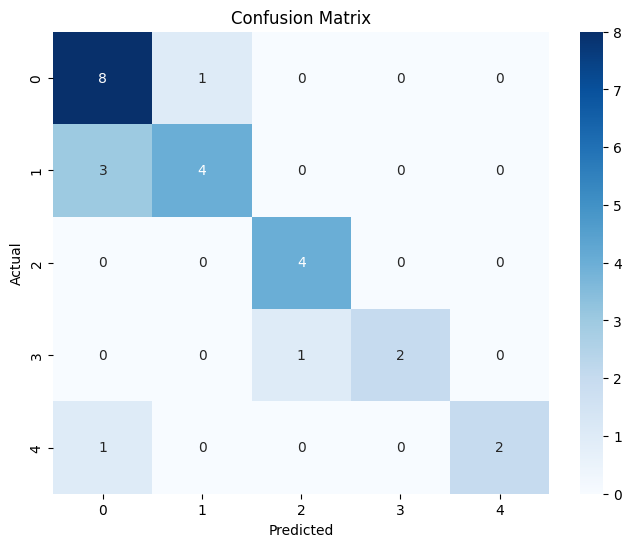

Cross-validation accuracy scores: [0.73076923 0.65384615 0.80769231 0.46153846 0.61538462]
Mean Cross-validation accuracy: 65.38%


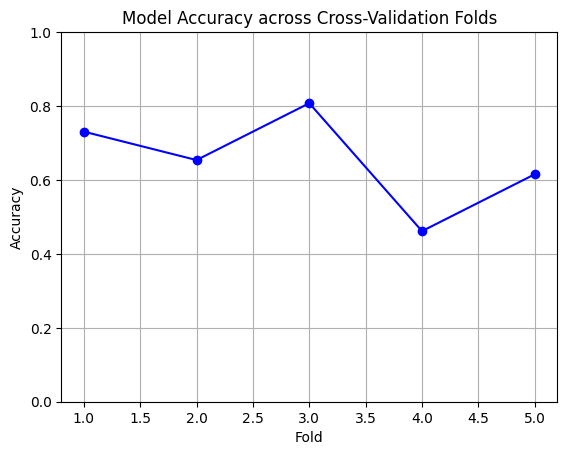

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif





# Step 1: Load the dataset
df = pd.read_csv('./Brain_GSE50161.csv')

# Step 2: Data Preprocessing
# Encode the target variable ('type') to numeric
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])  # Encoding 'normal', 'ependymoma', 'glioblastoma'

# Step 3: Splitting the data into training and testing sets
X = df[['1007_s_at', '1053_at', '117_at', '121_at', '1255_g_at', '1294_at', '1316_at', '1320_at']]  # Feature columns
y = df['type']  # Target column
selector = SelectKBest(score_func=f_classif, k='all')
X_selected = selector.fit_transform(X, y)

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_selected)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


# Step 5: Build and train the Naïve Bayes model
nb_classifier = GaussianNB()  # Gaussian Naive Bayes classifier for continuous data
nb_classifier.fit(X_train, y_train)

# Step 6: Predict and evaluate the model
y_pred = nb_classifier.predict(X_test)

# Accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Fix for classification_report
target_names = [str(cls) for cls in label_encoder.classes_]
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Cross-validation
cv_scores = cross_val_score(nb_classifier, X_scaled, y_encoded, cv=5)
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean Cross-validation accuracy: {cv_scores.mean() * 100:.2f}%")

# Cross-validation plot
plt.plot(range(1, 6), cv_scores, marker='o', color='b', label='Accuracy per fold')
plt.title('Model Accuracy across Cross-Validation Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()
